# Stock Market Prediction


## In this Notebook we try to predict Stock prices based on Stock prices of previous days.

### For that purpose, we will see simple eight ways to predict the Stock prices. The various models to be used are:

1. Average
2. Weighted Average
3. Moving Average
4. Moving Weighted Average
5. Linear Regression
6. Weighted Linear Regression
7. Lasso Regression
8. Gradient Boosting Regressor

## Importing the Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error as mse

In [3]:
# importing the dataset.

df = pd.read_csv('dataset/infy_stock.csv')

In [4]:
# checking the top 5 rows of the dataset.

df.head(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
3,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
4,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [5]:
# check the shape of the dataset.

df.shape

(248, 15)

In [7]:
# checking the info about the Dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 15 columns):
Date                  248 non-null object
Symbol                248 non-null object
Series                248 non-null object
Prev Close            248 non-null float64
Open                  248 non-null float64
High                  248 non-null float64
Low                   248 non-null float64
Last                  248 non-null float64
Close                 248 non-null float64
VWAP                  248 non-null float64
Volume                248 non-null int64
Turnover              248 non-null float64
Trades                248 non-null int64
Deliverable Volume    248 non-null int64
%Deliverble           248 non-null float64
dtypes: float64(9), int64(3), object(3)
memory usage: 29.1+ KB


In [8]:
# checking the first and last Date in the Dataset.

print('First Data in the dataset. ', df.Date.min())
print('First Data in the dataset. ', df.Date.max())

First Data in the dataset.  2015-01-01
First Data in the dataset.  2015-12-31


#### We can see that , we only have dataset of the working days, which means from 01.01.2015 to 31.12.2015, which counts to 248 records and from checking the info of the dataset, we can say that none of the attribute contains null values.

In [10]:
# Creating a sub dataframe only contains the data as index and closing of the stock market as a colummn
df_sub = df = pd.read_csv("dataset//infy_stock.csv", usecols=['Date', 'Close'], parse_dates=['Date'],index_col='Date')

In [11]:
df_sub.head()

,Close
Date,
2015-01-01,1974.40
2015-01-02,2013.20
2015-01-05,1995.90
2015-01-06,1954.20
2015-01-07,1963.55


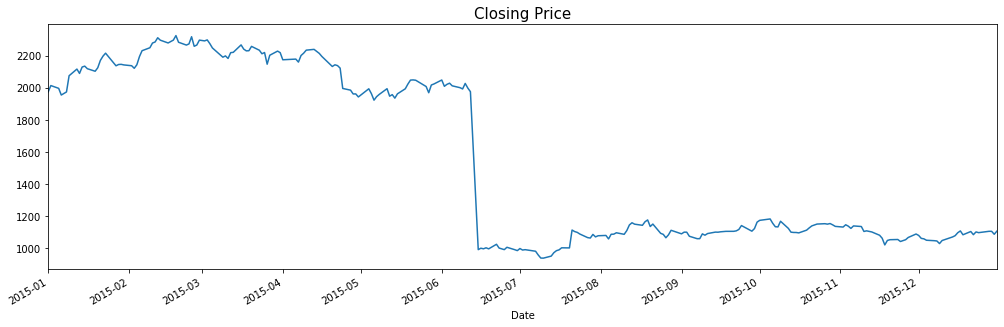

In [12]:
# Let's print the plot of Closing Prices on certain dates.

plt.figure(figsize=(17,5))
df.Close.plot()
plt.title("Closing Price", fontsize = 15)
plt.show()

### There is a huge drop on 15/06/2015. If we take this whole data, the prediction might not be as expected as there is a split in between!

### So either We have to either drop the data or adjust the values before split. Since the split is 2 for 1, we can normalize the data prior to split by dividing them by 2. (Old shares are half that of today's share)

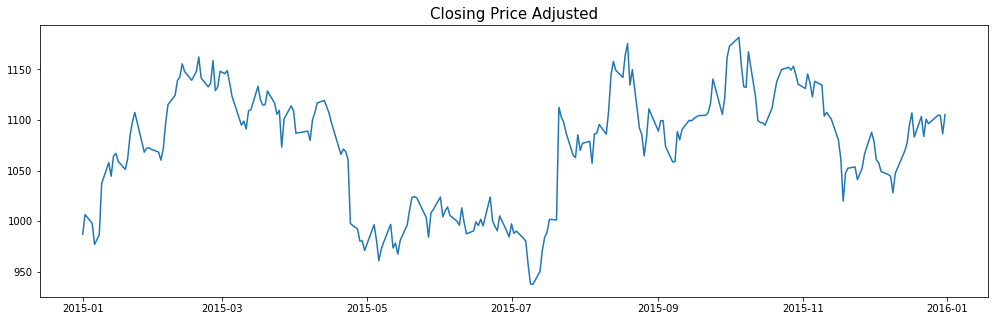

In [14]:
# Plotting the Adjusted Price.

plt.figure(figsize=(17,5))
stock_price = pd.concat([df_sub.Close[:'2015-06-12']/2, df_sub.Close['2015-06-15':]]) 
plt.plot(stock_price)
plt.title("Closing Price Adjusted",fontsize=15)
plt.show()

And now after adjusting the time series of Infosys stock prices.

Lets now Predict the Stock price based on various methods.

We will predict the values on last 68 days in the series.
We will use Mean squared error as a metrics to calculate the error in our prediction.
We will compare the results of various methods at the end.

In [27]:
#helper function to plot the stock prediction

starting_values = stock_price.iloc[:180]
y_test = stock_price.iloc[180:]

def plot_pred(pred,title):
    plt.figure(figsize=(17,5))
    plt.plot(prev_values,label='Train')
    plt.plot(y_test,label='Actual')
    plt.plot(pred,label='Predicted')
    plt.ylabel("Stock prices")
    plt.title(title,fontsize=15)
    plt.legend()
    plt.show()

In [28]:
# let's check the top 5 rows and shape of the stock price starting prices.

starting_values.head(), starting_values.shape

(Date
 2015-01-01     987.200
 2015-01-02    1006.600
 2015-01-05     997.950
 2015-01-06     977.100
 2015-01-07     981.775
 Name: Close, dtype: float64, (180,))

In [25]:
# and check the price of # let's check the top 5 rows and shape of the stock price starting prices.

y_test.head() , y_test.shape

(Date
 2015-09-21    1104.65
 2015-09-22    1107.45
 2015-09-23    1116.25
 2015-09-24    1140.55
 2015-09-28    1105.55
 Name: Close, dtype: float64, (68,))

## Let's start with 1. Average First.

In [17]:
y_av = pd.Series(np.repeat(prev_values.mean(), 68), index = y_test.index)
mse(y_av, y_test)

3173.6356476000856

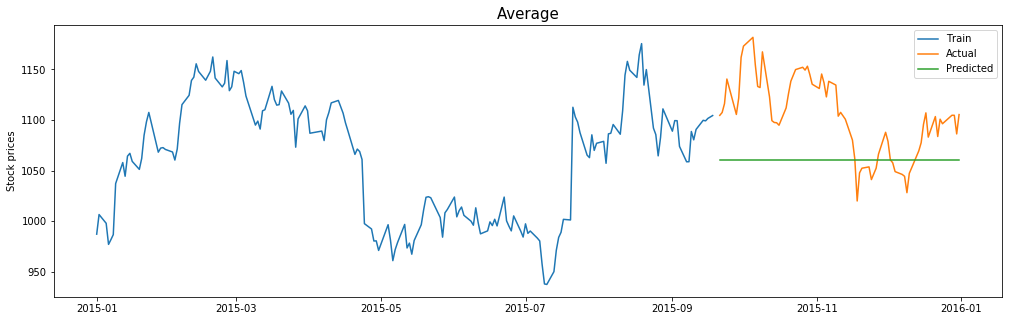

In [18]:
plot_pred(y_av, "Average")

### 2. Weighted Mean

We shall give more weightage to the data which are close to the last day in training data, while calculating the mean. The last day in the training set will get a weightage of 1(=180/180) and the first day will get a weightage of 1/180.

In [29]:
weight = np.array(range(0,180))/180
weighted_train_data =np.multiply(prev_values,weight)

# weighted average is the sum of this weighted train data by the sum of the weight

weighted_average = sum(weighted_train_data)/sum(weight)
y_wa = pd.Series(np.repeat(weighted_average,68),index=y_test.index)

mse(y_wa,y_test)

3496.475652551586

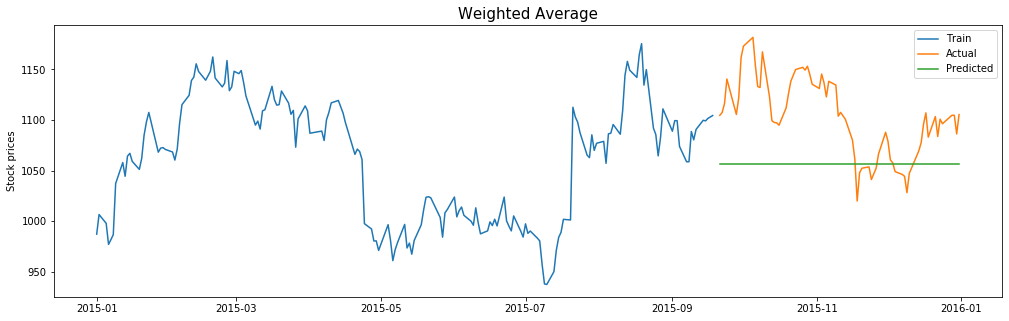

In [30]:
# Plotting the Weighted Average.

plot_pred(y_wa,"Weighted Average")

For the other methods we will predict the value of stock price on a day based on the values of stock prices of 80 days prior to it. So in our series we will not consider the first eight days (since there previous eighty days is not in the series).
We have to test the last 68 values. This would be based on the last 80 days stock prices of each day in the test data.
Since we have neglected first 80 and last 68 is our test set, the train dataset will be between 80 and 180 (100 days).

In [31]:
y_train = stock_price[80:180]
y_test = stock_price[180:]
print('y train:', y_train.shape, '\ny test:', y_test.shape)

y train: (100,) 
y test: (68,)


There are 100 days in training and 68 days in testing set. We will construct the features, that is the last 80 days stock for each date in the y_train and y_test. This would be our target variable.

In [32]:
X_train = pd.DataFrame([list(stock_price[i:i+80]) for i in range(100)],
                       columns=range(80,0,-1),index=y_train.index)
X_test = pd.DataFrame([list(stock_price[i:i+80]) for i in range(100,168)],
                       columns=range(80,0,-1),index=y_test.index)

X_train

,80,79,78,77,76,75,74,73,72,71,...,10,9,8,7,6,5,4,3,2,1
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-30,987.200,1006.600,997.950,977.100,981.775,986.725,1037.225,1057.975,1044.450,1064.325,...,1097.325,1089.625,1066.075,1071.300,1068.850,1061.000,997.600,992.325,980.450,980.575
2015-05-04,1006.600,997.950,977.100,981.775,986.725,1037.225,1057.975,1044.450,1064.325,1067.125,...,1089.625,1066.075,1071.300,1068.850,1061.000,997.600,992.325,980.450,980.575,971.125
2015-05-05,997.950,977.100,981.775,986.725,1037.225,1057.975,1044.450,1064.325,1067.125,1059.150,...,1066.075,1071.300,1068.850,1061.000,997.600,992.325,980.450,980.575,971.125,996.550
2015-05-06,977.100,981.775,986.725,1037.225,1057.975,1044.450,1064.325,1067.125,1059.150,1051.250,...,1071.300,1068.850,1061.000,997.600,992.325,980.450,980.575,971.125,996.550,981.375
2015-05-07,981.775,986.725,1037.225,1057.975,1044.450,1064.325,1067.125,1059.150,1051.250,1062.100,...,1068.850,1061.000,997.600,992.325,980.450,980.575,971.125,996.550,981.375,961.025
2015-05-08,986.725,1037.225,1057.975,1044.450,1064.325,1067.125,1059.150,1051.250,1062.100,1084.950,...,1061.000,997.600,992.325,980.450,980.575,971.125,996.550,981.375,961.025,972.000
2015-05-11,1037.225,1057.975,1044.450,1064.325,1067.125,1059.150,1051.250,1062.100,1084.950,1098.225,...,997.600,992.325,980.450,980.575,971.125,996.550,981.375,961.025,972.000,978.975
2015-05-12,1057.975,1044.450,1064.325,1067.125,1059.150,1051.250,1062.100,1084.950,1098.225,1107.525,...,992.325,980.450,980.575,971.125,996.550,981.375,961.025,972.000,978.975,996.825
2015-05-13,1044.450,1064.325,1067.125,1059.150,1051.250,1062.100,1084.950,1098.225,1107.525,1068.250,...,980.450,980.575,971.125,996.550,981.375,961.025,972.000,978.975,996.825,973.550


 X_train is now a collection of 100 dates as index and a collection of stock prices of previous 80 days as features.

  Similarlily, X_test is now a collection of 68 dates as index and a collection of stock prices of previous 80 days as features.

  NOTE: Here 76 working days from '2015-05-04', the stock had a price of 986.725 and 77 working days from '2015-05-05', the stock has the same value. You can see the similarity of values along the diagonal. This is because consecutitive data will be similar to the previous except it drops the last value, shifts and has a new value.

  We will use these values for stock price prediction in the other four methods.

## 3.  Moving Average

We have to predict the 68 values in data set and for each values we will get the average of previous 80 days.
This will be a simple mean of each column in the y_test

In [35]:
y_ma = X_test.mean(axis=1)

mse(y_ma, y_test)

2901.424183296469

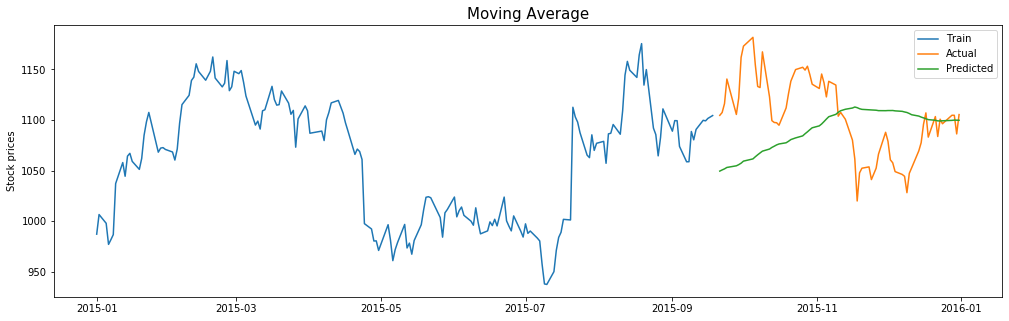

In [36]:
# Ploting the Moving Average

plot_pred(y_ma, 'Moving Average')

## 4. Weighted Moving Average

We will obtain the stock price on the test date by calculating the weighted mean of past 80 days. The last of the 80 day will have a weightage of 1(=80/80) and the first will have a weightage of 1/80.

In [37]:
weight = np.array(range(1, 81))/ 80

#weighted moving average
y_wma = X_test@weight / sum(weight)

mse(y_wma, y_test)

1769.4332039308204

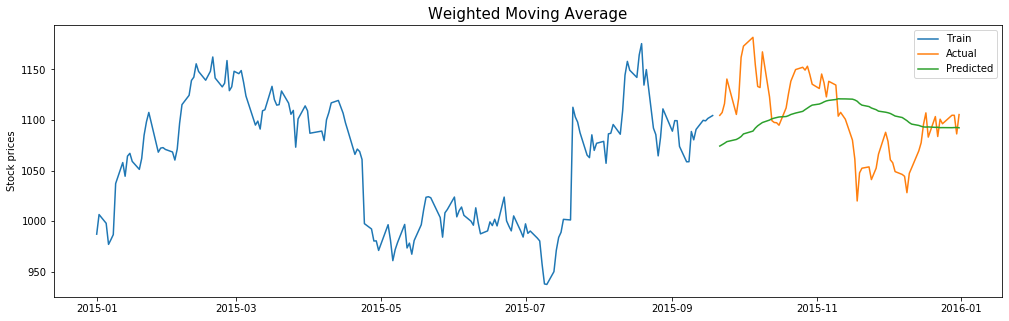

In [38]:
# Ploting the Weighted Moving Average

plot_pred(y_wma,"Weighted Moving Average")

## 5. Linear regression

In [40]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)
y_lr = pd.Series(y_lr,index=y_test.index)

mse(y_test,y_lr)

1754.1645412925627

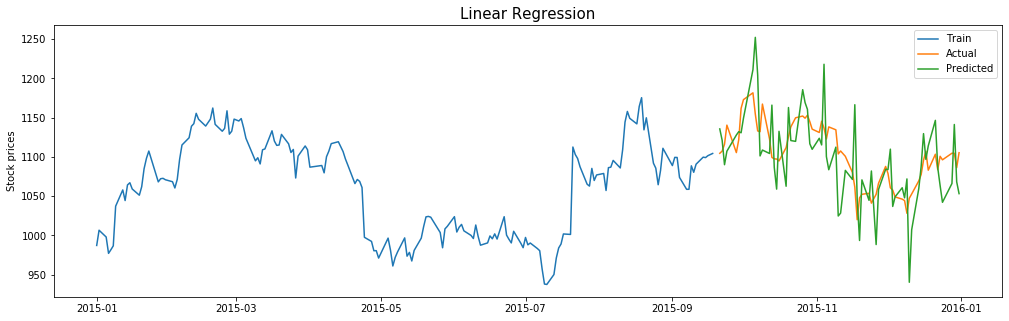

In [42]:
# Ploting the prediction with Linear Regression

plot_pred(y_lr,"Linear Regression")

## 6. Weighted Linear Regression

In This approach we will give weight to the input data rather than the features.

In [43]:
weight = np.array(range(1,101))/100
wlr = LinearRegression()

wlr.fit(X_train,y_train,weight)
y_wlr = wlr.predict(X_test)
y_wlr = pd.Series(y_wlr,index=y_test.index)

mse(y_test,y_wlr)

2054.361407878754

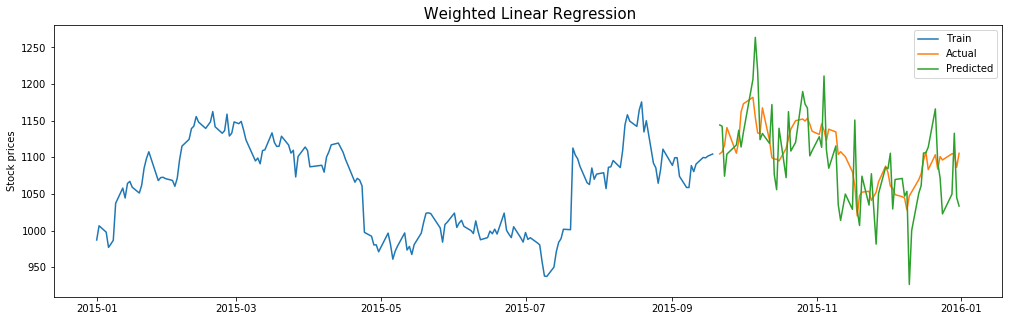

In [44]:
# Ploting the outcome of Weighted Linear Regression
plot_pred(y_wlr, ' Weighted Linear Regression')

## 7. Lasso Regression 

In [45]:
from sklearn.linear_model import Lasso
lasso = Lasso()

las = lasso.fit(X_train,y_train)
y_las = las.predict(X_test)
y_las = pd.Series(y_las,index = y_test.index)

mse(y_las,y_test)

/home/saudbinhabib/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 502.00215286973526, tolerance: 33.91328653187501
  positive)


1467.333864613377

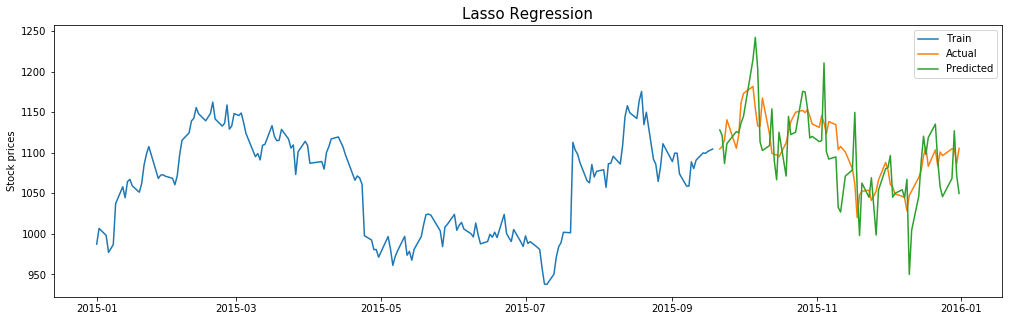

In [46]:
# Plotting the output of Lassor Regressor

plot_pred(y_las,"Lasso Regression")

## 8. Gradient Boosting Regressor.

In [47]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Initializing Gradient Boosting

gb = GradientBoostingRegressor(max_depth = 7, n_estimators=200, learning_rate = 0.01)

# making a list of params for the Gradient Search CV
param = [{'min_samples_split': [5, 9, 13], 'max_leaf_nodes': [3, 5, 7, 9], 'max_features': [8, 10, 15, 18]}]

# initializing the GradientSearchCV with the params
gs = GridSearchCV(gb, param, cv = 5, scoring = 'neg_mean_squared_error')

In [48]:
gs.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.01,
                                                 loss='ls', max_depth=7,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=200,
                                                 n_iter_...ne,
                         

In [49]:
gb = gs.best_estimator_

In [50]:
y_gb = gb.predict(X_test)
y_gb = pd.Series(y_gb,index = y_test.index)

mse(y_gb, y_test)

5266.399078917071

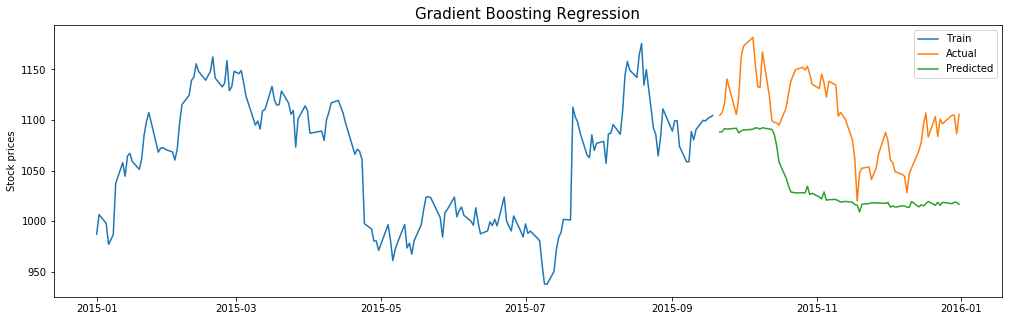

In [51]:
# Plotting the output of Gradrient Boosting Regressor

plot_pred(y_gb, "Gradient Boosting Regression")